In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
# Setting style for professional plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [7]:
# Path to our processed data
PROCESSED_DATA = "../data/shapefiles/health_map_pr_2025.gpkg"

# Loading our Spatial Data
gdf = gpd.read_file(PROCESSED_DATA)

In [8]:
print(f"Dataset Shape: {gdf.shape}")
print("\n--- Health Metrics Overview ---")
display(gdf[['name_muni', 'total_admissions', 'avg_cost', 'total_beds']].describe())

# Check for missing data (important for health registries)
missing_data = gdf['total_admissions'].isna().sum()
print(f"\nMunicipalities with no records: {missing_data}")

Dataset Shape: (399, 18)

--- Health Metrics Overview ---


,total_admissions,avg_cost,total_beds
count,399.000000,393.000000,393.000000
mean,25.142857,1063.926805,883.643766
std,63.749093,1837.678357,4078.289389
min,0.000000,150.262222,0.000000
25%,5.000000,422.643333,0.000000
50%,9.000000,651.727778,176.000000
75%,24.000000,1139.850000,439.000000
max,1049.000000,29917.260000,67359.000000



Municipalities with no records: 0


### 1. Intro & Data Quality
The dataset covers 399 municipalities in Paraná (PR). A critical observation is the high standard deviation in hospital beds ($std \approx 4078$) compared to the mean ($\approx 883$), indicating a massive centralisation of healthcare infrastructure in a few hub cities. There are approximately 6 municipalities with missing health records, which will be handled during the feature engineering phase to avoid model bias.

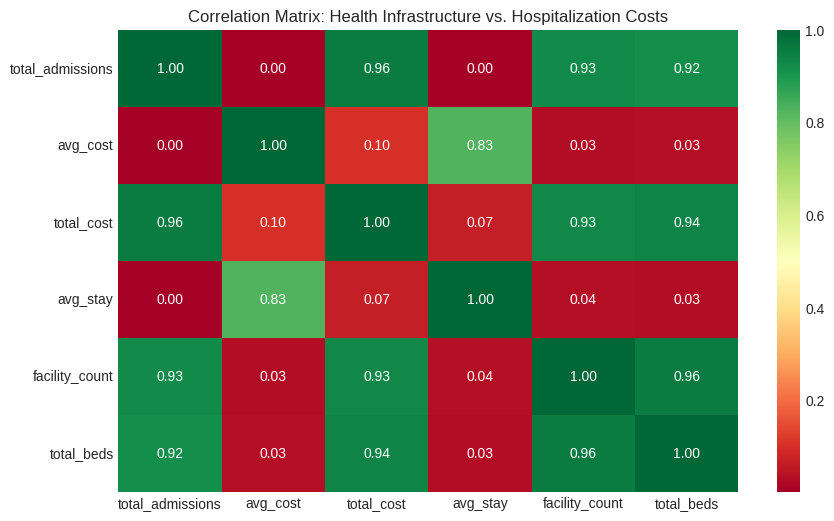

In [9]:
plt.figure(figsize=(10, 6))
correlation_cols = ['total_admissions', 'avg_cost', 'total_cost', 'avg_stay', 'facility_count', 'total_beds']
sns.heatmap(gdf[correlation_cols].corr(), annot=True, cmap='RdYlGn', fmt=".2f")
plt.title("Correlation Matrix: Health Infrastructure vs. Hospitalization Costs")
plt.show()

### 2. Correlation Analysis
The correlation matrix reveals that Average Stay (avg_stay) is the primary driver for Average Cost (avg_cost) ($r = 0.83$), rather than the volume of admissions alone. For healthcare payers (insurance companies), this suggests that reducing hospitalisation length through early chronic disease management is more financially impactful than simply reducing the number of events.

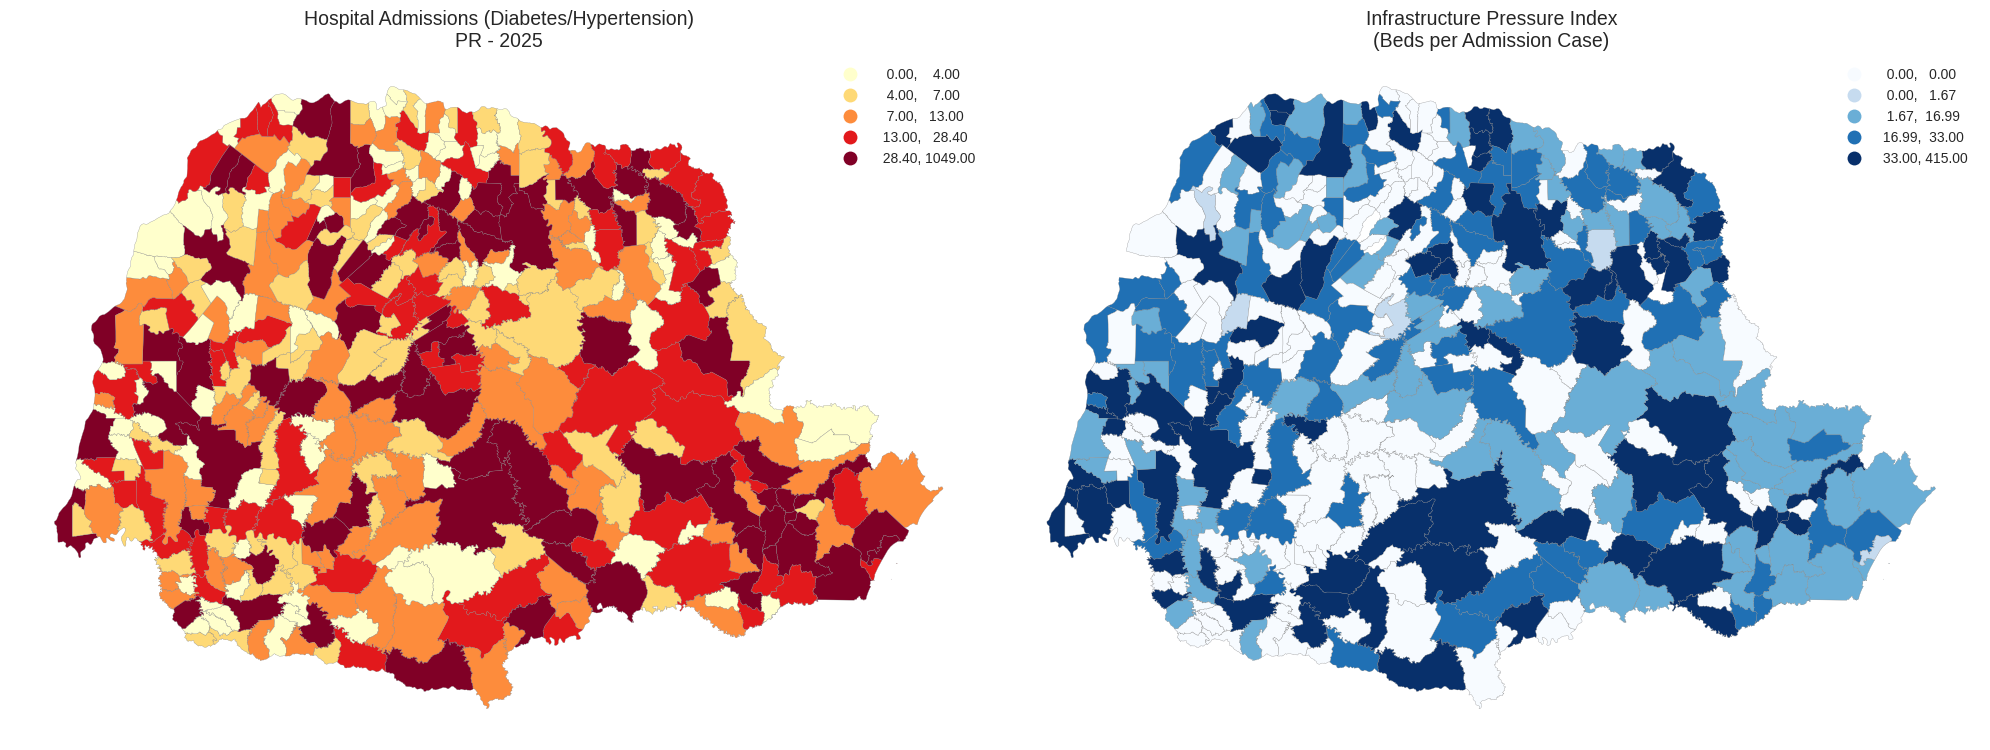

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Map 1: Admissions for Chronic Diseases
gdf.plot(column='total_admissions', cmap='YlOrRd', legend=True, 
         scheme='quantiles', k=5, ax=ax[0], edgecolor='0.5', linewidth=0.2)
ax[0].set_title('Hospital Admissions (Diabetes/Hypertension)\nPR - 2025', fontsize=14)
ax[0].axis('off')

# Map 2: Healthcare Infrastructure (Beds per 1000 inhabitants proxy)
# We can use our created feature 'beds_per_admission'
gdf.plot(column='beds_per_admission', cmap='Blues', legend=True, 
         scheme='quantiles', k=5, ax=ax[1], edgecolor='0.5', linewidth=0.2)
ax[1].set_title('Infrastructure Pressure Index\n(Beds per Admission Case)', fontsize=14)
ax[1].axis('off')

plt.tight_layout()
plt.show()

### 3. Spatial Insights & Infrastructure Pressure
The spatial analysis highlights a significant mismatch between disease prevalence and resource allocation. While 'Hospital Admissions' are spread across the state, the Infrastructure Pressure Index shows that several regions operate with a critical 'Beds per Admission' ratio (below 1.67). These 'Healthcare Deserts' represent high-risk zones for insurance providers, as patients in these areas likely require expensive medical transfers to hub cities.

### 4. Executive Summary for Recruiters
This exploratory analysis provides a data-driven foundation for a predictive risk model. Key takeaways for stakeholders:
- Operational Risk: Regional disparities in bed availability suggest that a 'one-size-fits-all' prevention program won't work for PR.
- Financial Opportunity: Chronic disease management (Diabetes/Hypertension) should focus on reducing stay duration, as it highly correlates with total expenditure.
- ML Roadmap: The next step involves using these spatial features to predict high-cost clusters using XGBoost, allowing for proactive resource allocation.